In [10]:
import pandas as pd
pd.options.plotting.backend = 'plotly'

import pymc3 as pm
import numpy as np

import cufflinks as cf
cf.go_offline()

import seaborn as sns
sns.set()

# 1. Probability and Inference

## 1.12 Exercises

### 1

a) Marginal probability density:

$$ \sum_{\theta}{p(\theta, y) d\theta} = \sum_{\theta}{p(\theta)p(y|\theta) d\theta} $$

$$ 0.5 \mathcal{N}(1,\,\sigma^{2}) + 0.5 \mathcal{N}(2,\,\sigma^{2}) $$

In [13]:
nm = pm.NormalMixture.dist(w=np.array([0.5, 0.5]), mu=np.array([1, 2]), sigma=np.array([2, 2]))
nm_data = pd.DataFrame(nm.random(size=10000))
#nm_data.plot(kind='hist')

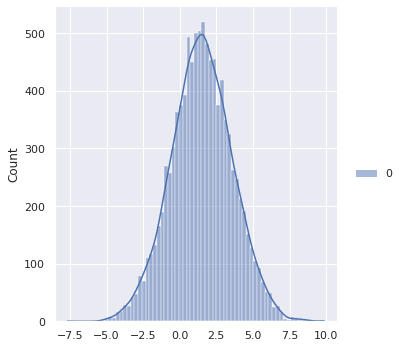

In [12]:
sns.displot(data=nm_data, kde=True)

b) $$ Pr(\theta=1 | y=1) $$

Posterior probability that $ \theta $ = 1, given observed data $ y = 1 $.

$$ Pr(\theta=1 | y=1) = \frac{p(y=1|\theta=1)p(\theta=1)}{p(y=1|\theta=1)p(\theta=1) + p(y=1|\theta=2)p(\theta=2)} = $$

In [14]:
nm1 = pm.Normal.dist(mu=1, sigma=2)
nm2 = pm.Normal.dist(mu=2, sigma=2)

In [21]:
nm1v = np.exp(nm1.logp(1).eval())
nm2v = np.exp(nm2.logp(1).eval())
display(nm1v)
display(nm2v)

0.19947114020071632

0.17603266338214973

$$ \frac{0.2*0.5}{0.2*0.5 + 0.176*0.5} $$

In [22]:
(0.2*0.5)/(0.2*0.5 + 0.176*0.5)

0.5319148936170213

53.2% probability

c) How does the posterior density change as $ \sigma^2 $ is increased, decreased?

- If $ \sigma^2 $ goes to $ \infty $ then posterior goes to prior = 0.5
- If $ \sigma^2 $ goes to $ 0 $ then posterior $ Pr(\theta=1|y=1) = 1 $, because there simply is no chance for a normal distribution with mean 2 to reach a value of 1.

### 2

Conditional means and variances: show that 1.8 and 1.9 hold if u is a vector.